## ![Udacity](https://i.pcmag.com/imagery/reviews/02v0qFMRbeFy5jTmcbCwCGx-14..1616431306.png)

## Project: Write a Data Science Blog Post

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## <a id='intro'></a>
## Introduction

For this project I decided to analyse the Seattle Airbnb Open Data found on Kaggle: https://www.kaggle.com/datasets/airbnb/boston using the CRISP-DM Process of:

- Business Understanding
- Data Understanding
- Prepare Data
- Data Modeling
- Evaluate the Results
- Deploy

## Business Understanding

Airbnb is a community-based online platform for listing and renting local homes which currently have millions of users. It connects hosts and travelers and facilitates the process of renting without owning any rooms itself. The income of Airbnb are mainly from commission fee of every booking. Therefore, how to increase the volume of transactions and how to increase the customer retention are important for Airbnb. 

This analysis consist in explore the dataset containing listing, calendar and review which is focused on finding the meaningful insights and predict the booking price for a new property given a date and other features. So, in order,in order to clarify the issues, some of the question to be investigated as below:

- What is the best price of Neighbourhoods in Seattle?
- The comparison price per night among the Property type?
- The range/distribution of booking price?
- What is the trend of number of listings booked per month and per season?
- What is the important factors for guests in choosing accommodations

In [170]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import PIL.Image as image
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

## Load dataframe and have an overview about data

In [48]:
# import data listings
df_listings = pd.read_csv('./data/listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [176]:
# import data calendar
df_calendar = pd.read_csv('./data/calendar.csv')
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [177]:
# import data calendar
df_reviews = pd.read_csv('./data/reviews.csv')
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


## Data Wrangling

In [179]:
print('Number of row and column of listing data:', df_listings.shape)
print('Number of row and column of listing data:', df_calendar.shape)
print('Number of row and column of listing data:', df_reviews.shape)


Number of row and column of listing data: (3818, 92)
Number of row and column of listing data: (1393570, 4)
Number of row and column of listing data: (84849, 6)


In [183]:
# Check the infomation of missing value and also datatype of dataframe

In [180]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [181]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [184]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [185]:
#check null value

In [187]:
df_listings.isnull().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

In [189]:
df_calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [190]:
df_reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

## <a id='eda'></a>
## Exploratory Data Analysis

> In order to do the data analysis, we make some question and step by step solve it



## 1. What is the best price of Neighbourhoods in Seattle?

In [38]:
# 'Function to convert data type of any column
def convert_datatype(df, col_name, d_type):    
    df[col_name]  = df[col_name].astype(d_type)
    return df 

In [39]:
#  Function to replace a given special character with another 
def replace_special_character(df, col_name, from_sp_char, 
                              to_char, to_dtype):  
    
    df[col_name] = df[col_name].replace(from_sp_char, to_char, regex=True).astype(to_dtype)
    
    return df 

In [42]:
# Convert Price to numeric
listings = replace_special_character(df_listings, 'price', '[\$,]', '', 'float')
listings = convert_datatype(listings, 'price', 'int')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


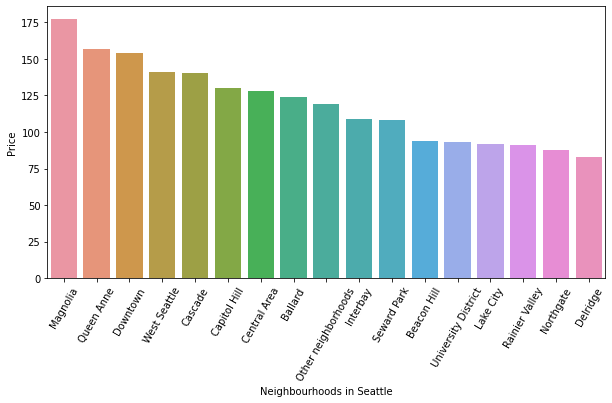

In [50]:
# Plot mean price per neighbourhood group

x = pd.DataFrame(listings.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=False))
x = x.reset_index()
x['price'] = x['price'].astype('int')

plt.rcParams["figure.figsize"] = (10,5)

sns.barplot(x = 'neighbourhood_group_cleansed',
            y = 'price',
            data = x)
plt.xticks(rotation=60)
plt.xlabel('Neighbourhoods in Seattle')
plt.ylabel('Price')
plt.show()

## According to this plot we can see that:
- Magnolia is the most expensive place to stay with a mean price per night going above 175 dollars.
- Queen Anne and Downtown are just behind with a mean price just above 150 dollars.
- Delridge seems to be very cheap for renting Airbnb rooms/ apartments with a mean price of just above 75 dollars.
- Rainier Valley and Northgate are cheap too.

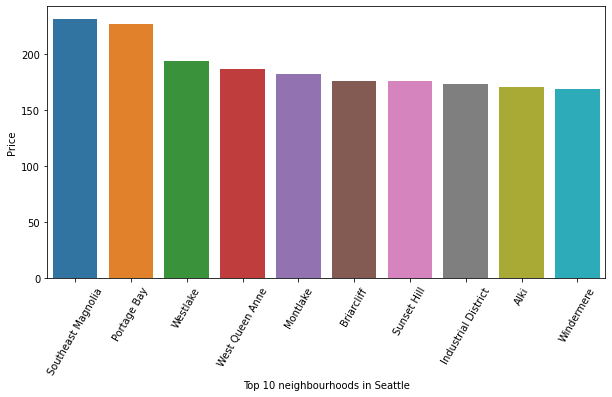

In [51]:
# Plot the top 10 most expensive neighbourhoods

x = pd.DataFrame(listings.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).head(10))
x = x.reset_index()
x['price'] = x['price'].astype('int')

plt.rcParams["figure.figsize"] = (10,5)

sns.barplot(x = 'neighbourhood_cleansed',
            y = 'price',
            data = x)
plt.xticks(rotation=60)
plt.xlabel('Top 10 neighbourhoods in Seattle')
plt.ylabel('Price')
plt.show()

### Base on the analysis and the chart above can help us to conclude that Southeas Mangolia is most expensive neighborhoods in Seatle, and Windemere is the cheapest one

## 2. The comparision price per night among the Property type?

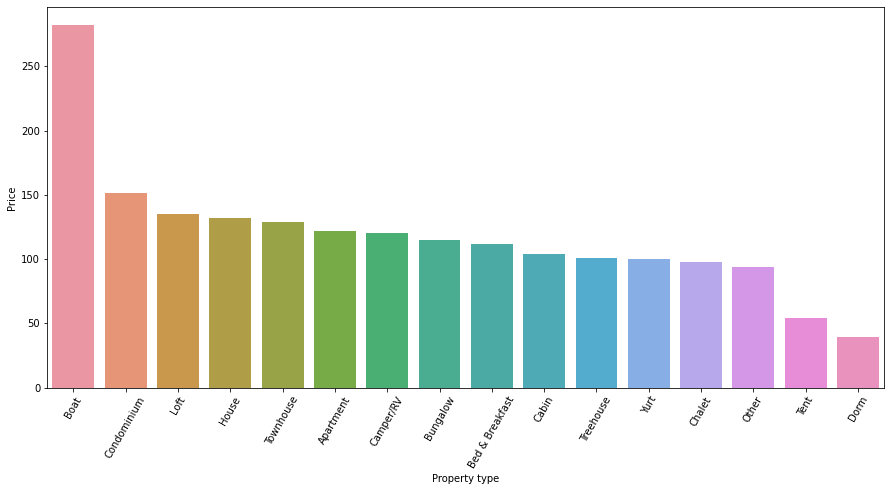

In [137]:
# PLot mean price per Property type
x = pd.DataFrame(listings.groupby('property_type')['price'].mean().sort_values(ascending=False))
x = x.reset_index()
x['price'] = x['price'].astype('int')

plt.rcParams["figure.figsize"] = (15,7)

sns.barplot(x = 'property_type',
            y = 'price',
            data = x)
plt.xticks(rotation=60)
plt.xlabel('Property type')
plt.ylabel('Price')
plt.show()

### Base on this bar chart, the boat is the most expensive cost property type, and Dorm is a cheapest one

## calendar analysis

In [57]:
import calendar
df_calendar['month'] = pd.DatetimeIndex(df_calendar['date']).month # Extract month from date
df_calendar['day'] = pd.to_datetime(df_calendar['date']).dt.day_name() # Extract weekday name from date
df_calendar


# Convert using calender's day_name method
#calender.day_name[date.weekday()]

,listing_id,date,available,price,month,day
0,241032,2016-01-04,t,$85.00,1,Monday
1,241032,2016-01-05,t,$85.00,1,Tuesday
2,241032,2016-01-06,f,NaN,1,Wednesday
3,241032,2016-01-07,f,NaN,1,Thursday
4,241032,2016-01-08,f,NaN,1,Friday
...,...,...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN,12,Thursday
1393566,10208623,2016-12-30,f,NaN,12,Friday
1393567,10208623,2016-12-31,f,NaN,12,Saturday
1393568,10208623,2017-01-01,f,NaN,1,Sunday


In [61]:
# Map each month to the corresponding season
map_season = {12: 'winter', 1:'winter', 2:'winter',
              3:'spring', 4:'spring', 5:'spring',            
              6:'summer', 7:'summer', 8:'summer',
              9: 'autumn', 10: 'autumn', 11: 'autumn'
             }
df_calendar['season'] = df_calendar['month'].map(map_season) 
df_calendar 

,listing_id,date,available,price,month,day,season
0,241032,2016-01-04,t,$85.00,1,Monday,winter
1,241032,2016-01-05,t,$85.00,1,Tuesday,winter
2,241032,2016-01-06,f,NaN,1,Wednesday,winter
3,241032,2016-01-07,f,NaN,1,Thursday,winter
4,241032,2016-01-08,f,NaN,1,Friday,winter
...,...,...,...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN,12,Thursday,winter
1393566,10208623,2016-12-30,f,NaN,12,Friday,winter
1393567,10208623,2016-12-31,f,NaN,12,Saturday,winter
1393568,10208623,2017-01-01,f,NaN,1,Sunday,winter


In [63]:
# Map each month number to the corresponding name
map_month = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',          
            7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df_calendar['month'] = df_calendar['month'].map(map_month)
df_calendar 

,listing_id,date,available,price,month,day,season
0,241032,2016-01-04,t,$85.00,Jan,Monday,winter
1,241032,2016-01-05,t,$85.00,Jan,Tuesday,winter
2,241032,2016-01-06,f,NaN,Jan,Wednesday,winter
3,241032,2016-01-07,f,NaN,Jan,Thursday,winter
4,241032,2016-01-08,f,NaN,Jan,Friday,winter
...,...,...,...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN,Dec,Thursday,winter
1393566,10208623,2016-12-30,f,NaN,Dec,Friday,winter
1393567,10208623,2016-12-31,f,NaN,Dec,Saturday,winter
1393568,10208623,2017-01-01,f,NaN,Jan,Sunday,winter


In [64]:
df_calendar= df_calendar.rename(columns={'price': 'target'}) # Rename 'price' column to 'target'
df_calendar 

,listing_id,date,available,target,month,day,season
0,241032,2016-01-04,t,$85.00,Jan,Monday,winter
1,241032,2016-01-05,t,$85.00,Jan,Tuesday,winter
2,241032,2016-01-06,f,NaN,Jan,Wednesday,winter
3,241032,2016-01-07,f,NaN,Jan,Thursday,winter
4,241032,2016-01-08,f,NaN,Jan,Friday,winter
...,...,...,...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN,Dec,Thursday,winter
1393566,10208623,2016-12-30,f,NaN,Dec,Friday,winter
1393567,10208623,2016-12-31,f,NaN,Dec,Saturday,winter
1393568,10208623,2017-01-01,f,NaN,Jan,Sunday,winter


In [66]:
# Make a subset of all the dates when the properties are booked
# This data can be used to make some insights on the booked properties

calendar_booked = df_calendar[df_calendar['available']=='f']
set(calendar_booked['available']) 

{'f'}

In [69]:
# Drop records which do not have any booking price
df_calendar = df_calendar[df_calendar['available']=='t']
set(df_calendar['available'])

{'t'}

In [171]:
# Convert Price to numeric
calendar = replace_special_character(df_calendar, 'target', '[\$,]', '', 'float')
calendar = convert_datatype(df_calendar, 'target', 'int')
calendar

,listing_id,date,available,target,month,day,season
0,241032,2016-01-04,t,85,Jan,Monday,winter
1,241032,2016-01-05,t,85,Jan,Tuesday,winter
9,241032,2016-01-13,t,85,Jan,Wednesday,winter
10,241032,2016-01-14,t,85,Jan,Thursday,winter
14,241032,2016-01-18,t,85,Jan,Monday,winter
...,...,...,...,...,...,...,...
1393207,10208623,2016-01-06,t,87,Jan,Wednesday,winter
1393208,10208623,2016-01-07,t,87,Jan,Thursday,winter
1393211,10208623,2016-01-10,t,87,Jan,Sunday,winter
1393212,10208623,2016-01-11,t,87,Jan,Monday,winter


## 3. The range/distribution of booking price?

Text(0.5, 0, 'Booking price')

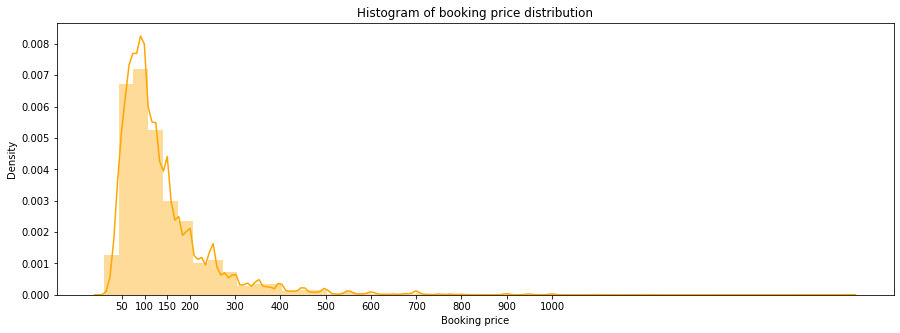

In [172]:
# Histogram of booking price distribution
plt.rcParams["figure.figsize"] = (15,5)
sns.distplot(calendar['target'], color='orange')
x = [50, 100, 150, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
plt.xticks(x)
plt.title('Histogram of booking price distribution')
plt.xlabel('Booking price')

#### From this plot we can see the booking price is right skeness, with the booking price is concentrate aroung 100-150 usd, the tail with price >300 usd is very rare

## 4. What is the trend of number of listings booked per month and per season?

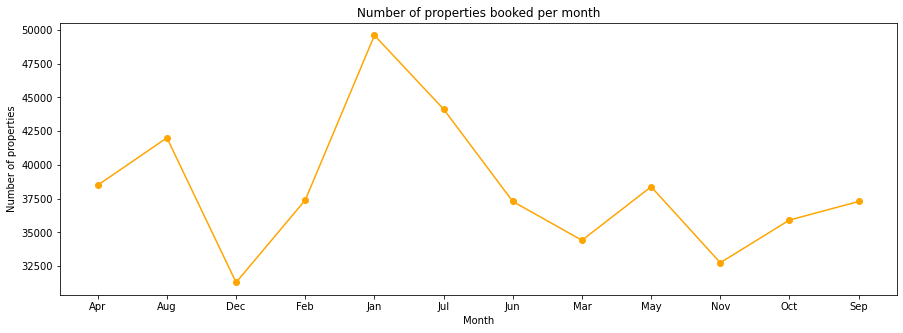

In [74]:
# Calculate number of listings booked per month
monthly_bookings = calendar_booked.groupby(['month'])['date'].count().reset_index(name='count')

# Plot the number of listings available per month
plt.plot(monthly_bookings['month'], monthly_bookings['count'], color='orange', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of properties')
plt.title('Number of properties booked per month')
plt.show()

In [121]:
# Calculate number of listings available for booking per season
seasonal_bookings = calendar_booked.groupby(['season'])['date'].count().reset_index(name='count')
df_seasonal_bookings = seasonal_bookings.set_index('season')
df_seasonal_bookings

,count
season,
autumn,105974
spring,111310
summer,123443
winter,118301


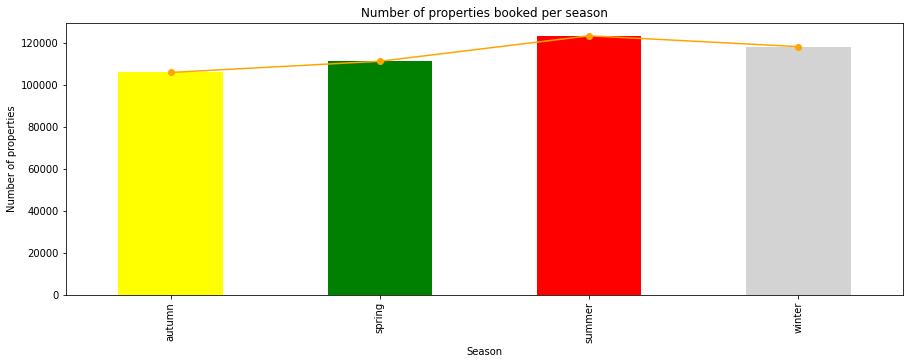

In [127]:
# Plot the number of listings available for booking per season
plt.plot(df_seasonal_bookings['count'], color='orange', marker='o')
df_seasonal_bookings['count'].plot(kind = 'bar',   color=[ 'yellow', 'green', 'red', 'lightgrey'])
plt.xlabel('Season')
plt.ylabel('Number of properties')
plt.title('Number of properties booked per season')
plt.show()

### With 02 plot base month and season, we can see the summer and winter season is the best season that have most booking number, it's match with the trend base on month in the first plot beetween number of booking and month, the best month for booking number is Jan & July (that is the month in winter and summer)

## 5. What is the important factors for guests in choosing accomodations

## Review analysis


In [139]:
reviews = df_reviews.dropna()
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del..."
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si..."


In [140]:
reviews = reviews.dropna()
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del..."
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si..."


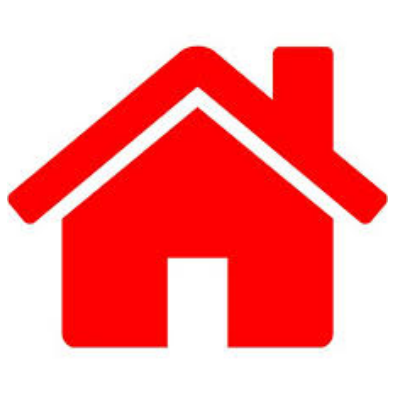

In [168]:
from PIL import Image
wc_mask = np.array(Image.open('house1.jpg'))

plt.imshow(wc_mask, interpolation='bilinear')
plt.axis('off')
plt.show()

In [191]:
comments = ''.join(list(reviews['comments'].values))
comments = comments.replace('\r', '')
comments = comments.replace('\n', '')
comments = comments.replace('Seattle', '')
comments[:5000]

'Cute and cozy place. Perfect location to everything! Kelly has a great room in a very central location. Beautiful building , architecture and a style that we really like. We felt guite at home here and wish we had spent more time.Went for a walk and found  Center with a major food festival in progress. What a treat.Visited the Space Needle and the Chihuly Glass exhibit. Then Pikes Place Market. WOW.  Thanks for a great stay.Very spacious apartment, and in a great neighborhood.  This is the kind of apartment I wish I had!Didn\'t really get to meet Kelly until I was on my out, but she was always readily available by phone. I believe the only "issue" (if you want to call it that) was finding a place to park, but I sincerely doubt its easy to park anywhere in a residential area after 5 pm on a FridayClose to  Center and all it has to offer - ballet, theater, museum, Space Needle, restaurants of all ilk just blocks away, and the Metropolitan (probably the coolest grocer you\'ll ever find).

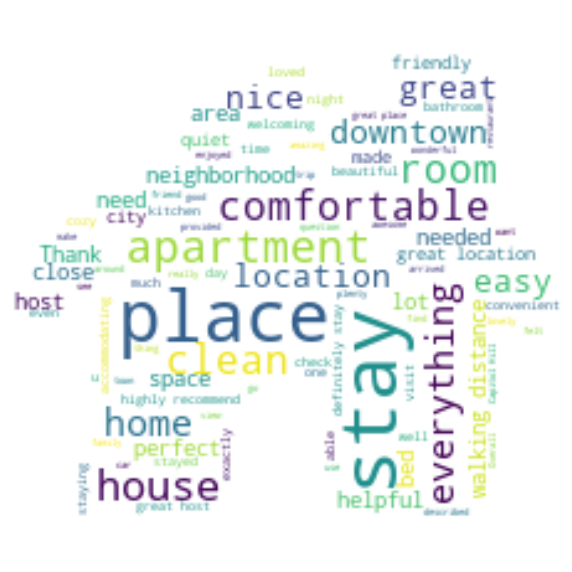

In [169]:
# Vẽ wordclouds với wc_mask
from wordcloud import WordCloud, STOPWORDS
wc1 = WordCloud(background_color='white', max_words=1000, 
                mask=wc_mask, stopwords=STOPWORDS)

wc1.generate(comments)

plt.figure(figsize=(10, 12))
plt.imshow(wc1, interpolation='bilinear')
plt.axis('off')
plt.show()

In [175]:
wc1.to_file('House_reviews_wordcloud.jpg')

### Base on the Wordcloud analysis, we can find that key words which frequently appear in reviews are "place", "stay", "apartment", "house", "comfortable", "clean", "room", which means that location, the property of listings, comfort, Cleanliness are important factors for guests in choosing accomodations. This data analysis can give good recommend for accomodation to improve servies and somethings like that

## <a id='conclusions'></a>
## Conclusions:

## According to all above analysis we can find out the ideas and some conclusion as below:
- Magnolia, Queen Anne, and Downtown are the most expensive neighborhoods in Seattle for Airbnb.
- Delridge is the cheapest one to stay in.
- Staying in a boat would be the most expensive cost and staying in a dormitory will be the cheapest place.
- January & July is the peak month when it comes to bookings.
- Summer & winter is the peak season for bookings.
- Machine learning apply will be do in next study to predict the price based on the other correlated features